In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
import astropy.units as u
from astropy.cosmology import Planck18, z_at_value

In [2]:
import matplotlib

font = {'family' : 'serif',
        'size'   : 16}

matplotlib.rc('font', **font)


In [3]:
plotdir = 'mtot_q_grid_plots/'

In [4]:
Mcs = [7, 10, 20, 30, 40, 50, 60, 70, 80]
Mc_files = ['mtot_q_lam_grids/mtot_'+str(mc)+'_DL_1000_Mc_lam_grid.csv' for mc in Mcs]


df1 = pd.DataFrame()
for fi in Mc_files:
    df_temp = pd.read_csv(fi)
    df1 = df1.append(df_temp)
# drop the zero rows that resulted from NoneType Networks
df = df1.loc[~(df1==0).all(axis=1)]


In [5]:
# drop the zero rows that resulted from NoneType Networks
# df = df.loc[~(df==0).all(axis=1)]
df = df[df["Mc"] > 0]



print("Total number of events:",len(df))


df

Total number of events: 1346


,Mc,eta,DL,z,m1,m2,M_tot,q,snr,inspiral_t,...,inner_10,inner_11,inner_12,inner_13,inner_14,inner_15,inner_16,inner_17,inner_18,inner_19
5,3.505843,0.233797,1000.0,0.19782,5.259684,3.125055,8.384739,1.683069,128.390426,1110.997722,...,0.992895,0.991671,0.990408,0.989113,0.987791,0.986446,0.985078,0.983688,0.982273,0.980831
6,3.649614,0.249994,1000.0,0.19782,4.213436,4.171302,8.384739,1.010101,132.971728,1039.491023,...,0.992376,0.991075,0.989733,0.988359,0.986956,0.985527,0.984071,0.982587,0.981071,0.979522
9,3.505843,0.233797,1000.0,0.19782,5.259684,3.125055,8.384739,1.683069,128.390426,1110.997722,...,0.992895,0.991671,0.990408,0.989113,0.987791,0.986446,0.985078,0.983688,0.982273,0.980831
11,3.649614,0.249994,1000.0,0.19782,4.213436,4.171302,8.384739,1.010101,132.971728,1039.491023,...,0.992376,0.991075,0.989733,0.988359,0.986956,0.985527,0.984071,0.982587,0.981071,0.979522
12,3.132206,0.193762,1000.0,0.19782,6.180778,2.203961,8.384739,2.804396,116.442387,1339.038646,...,0.993248,0.992062,0.990832,0.989566,0.988271,0.986950,0.985606,0.984241,0.982853,0.981442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,24.194740,0.100863,1000.0,0.19782,84.918947,10.906636,95.825583,7.785989,498.947468,42.015308,...,0.924393,0.911139,0.897553,0.883825,0.870137,0.856656,0.843533,0.830892,0.818835,0.807431
232,18.834439,0.066443,1000.0,0.19782,88.967828,6.857755,95.825583,12.973317,391.810355,63.337047,...,0.966410,0.959917,0.953015,0.945752,0.938178,0.930346,0.922306,0.914110,0.905807,0.897446
235,14.356238,0.042260,1000.0,0.19782,91.588634,4.236950,95.825583,21.616644,305.013412,99.093464,...,0.986940,0.984243,0.981307,0.978139,0.974743,0.971125,0.967293,0.963253,0.959012,0.954578
238,18.834439,0.066443,1000.0,0.19782,88.967828,6.857755,95.825583,12.973317,391.810355,63.337047,...,0.966410,0.959917,0.953015,0.945752,0.938178,0.930346,0.922306,0.914110,0.905807,0.897446


In [6]:
n_lams = 20
lam_colnames = ['lam_'+str(id) for id in range(n_lams)]
lams = df[lam_colnames].iloc[0].values

bias_colnames = ['bias_'+str(id) for id in range(n_lams)]
bias_lams = df[bias_colnames]
rel_bias_lams = df[bias_colnames].div(df["Mc"], axis='rows')

sig_bias_lams = df[bias_colnames].div(df["Mc_stat_err"], axis='rows')

inner_colnames = ['inner_'+str(id) for id in range(n_lams)]
inner_prod_lams = df[inner_colnames]

rel_bias_lams

,bias_0,bias_1,bias_2,bias_3,bias_4,bias_5,bias_6,bias_7,bias_8,bias_9,bias_10,bias_11,bias_12,bias_13,bias_14,bias_15,bias_16,bias_17,bias_18,bias_19
5,5.357532e-12,4.087305e-08,1.321533e-07,3.036111e-07,5.670986e-07,9.100413e-07,1.293306e-06,0.000002,0.000002,0.000002,1.788393e-06,1.266948e-06,3.878618e-07,8.451552e-07,0.000002,0.000004,0.000006,0.000008,0.000010,0.000011
6,8.630762e-12,6.205610e-08,1.872802e-07,4.106850e-07,7.447904e-07,1.171673e-06,1.640675e-06,0.000002,0.000002,0.000002,2.145639e-06,1.464739e-06,3.489524e-07,1.190331e-06,0.000003,0.000005,0.000008,0.000010,0.000012,0.000014
9,5.357532e-12,4.087305e-08,1.321533e-07,3.036111e-07,5.670986e-07,9.100413e-07,1.293306e-06,0.000002,0.000002,0.000002,1.788393e-06,1.266948e-06,3.878618e-07,8.451552e-07,0.000002,0.000004,0.000006,0.000008,0.000010,0.000011
11,8.630762e-12,6.205610e-08,1.872802e-07,4.106850e-07,7.447904e-07,1.171673e-06,1.640675e-06,0.000002,0.000002,0.000002,2.145639e-06,1.464739e-06,3.489524e-07,1.190331e-06,0.000003,0.000005,0.000008,0.000010,0.000012,0.000014
12,5.493181e-12,3.671214e-08,1.059928e-07,2.281312e-07,4.114789e-07,6.480039e-07,9.116878e-07,0.000001,0.000001,0.000001,1.257154e-06,8.972663e-07,2.858511e-07,5.777292e-07,0.000002,0.000003,0.000004,0.000006,0.000007,0.000008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,1.058906e-09,8.094685e-06,2.393415e-05,5.042280e-05,8.804985e-05,1.341253e-04,1.825191e-04,0.000224,0.000247,0.000239,1.881713e-04,8.510075e-05,7.584979e-05,2.951819e-04,0.000568,0.000882,0.001222,0.001568,0.001896,0.002183
232,2.199601e-09,1.137805e-05,2.104713e-05,2.723104e-05,2.861680e-05,2.459548e-05,1.542358e-05,0.000002,0.000013,0.000027,3.683864e-05,3.918988e-05,3.072439e-05,8.829377e-06,0.000028,0.000081,0.000148,0.000227,0.000314,0.000403
235,3.540341e-09,1.869985e-05,3.644567e-05,5.166234e-05,6.289484e-05,6.890049e-05,6.872629e-05,0.000062,0.000048,0.000027,1.878934e-07,3.189594e-05,6.783267e-05,1.060331e-04,0.000145,0.000182,0.000216,0.000245,0.000268,0.000283
238,2.199601e-09,1.137805e-05,2.104713e-05,2.723104e-05,2.861680e-05,2.459548e-05,1.542358e-05,0.000002,0.000013,0.000027,3.683864e-05,3.918988e-05,3.072439e-05,8.829377e-06,0.000028,0.000081,0.000148,0.000227,0.000314,0.000403


In [7]:
def plot_bias_features(x, y, feature, show_unbiased=False, mtot=None, qmax=None, colormap='RdBu_r',\
        xlabel="Mc ($M_\odot$)", ylabel="$\eta", cbar_label="Faithfulness",\
        title="Minimum Faithfulness required \nfor unbiased Mc", xlim=None, ylim=None, plt_show=True, savefig=None, **kwargs):
    
    mask = np.ones(len(df["Mc"]), dtype=bool)
    z = df["z"].iloc[0]

    if qmax is not None:
        mask = mask * (df["q"] < qmax) 
        title = title + " (q < " + str(np.round(qmax,2)) + ")"
    
    x = x[mask]
    y = y[mask]
    feature = feature[mask]

    fig, ax = plt.subplots(figsize=(8, 6))
    cm = plt.cm.get_cmap(colormap)

    sc = plt.scatter(x, y, c=feature, cmap=cm, **kwargs)
    cbar = plt.colorbar(sc)
    cbar.set_label(cbar_label)

    if show_unbiased:
        unbiased_mask = (df["Mc_stat_err"]>df["bias_9"])
        plt.scatter(x[unbiased_mask*mask], y[unbiased_mask*mask], c="white",  s=100, edgecolors='g', lw=3, label='Unbiased')
        plt.legend()

    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.tight_layout()

    # if savefig is not None:
        # plt.savefig(plotdir+savefig+'.pdf')
    if plt_show:
        plt.show()


# Overall Population

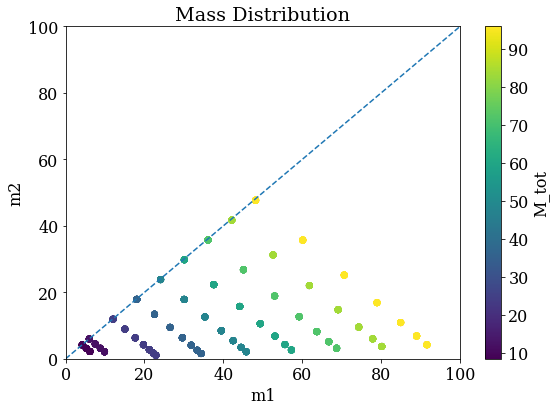

In [8]:
# Mass Distribution
plot_bias_features(df["m1"], df["m2"], df["M_tot"], colormap="viridis", mtot=None,\
    title="Mass Distribution", xlabel="m1", ylabel="m2", cbar_label="M_tot", plt_show=False, savefig='mass_dist')
mmax = 100
plt.xlim(0, mmax)
plt.ylim(0, mmax)
x=np.linspace(0, mmax, 10)
plt.plot(x, x, '--')


No handles with labels found to put in legend.


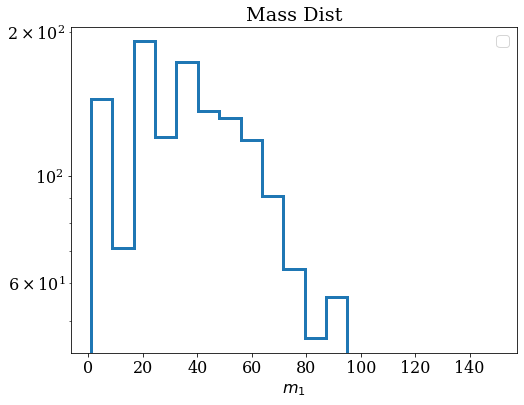

In [9]:
# Mass Distribution
fig, ax = plt.subplots(figsize=(8, 6))
bins = np.linspace(1, 150, 20)
x = np.linspace(5, 150, 100)
plt.hist(df["m1"], bins, histtype='step', lw=3)
# plt.plot(x, 2000000*x**(-3.5), linestyle='--', label='$p(m_1) \propto m_1^{-3.5}$')

plt.semilogy()

plt.xlabel("$m_1$")
plt.ylabel("")
plt.title("Mass Dist")
plt.legend()

# plt.savefig(plotdir+"powerlaw_m1_dist.pdf")
plt.show()

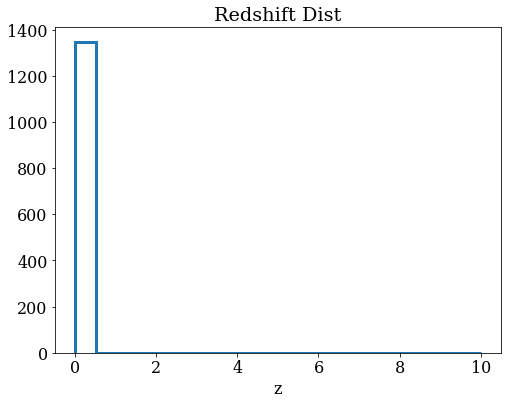

In [10]:
# Redshift Distribution
fig, ax = plt.subplots(figsize=(8, 6))
bins = np.linspace(0, 10, 20)

plt.hist(df["z"], bins, histtype='step', lw=3)

plt.xlabel("z")
plt.ylabel("")
plt.title("Redshift Dist")
plt.show()

In [11]:
df["z"].iloc[0]

0.1978197924849624

# Bias Stuff

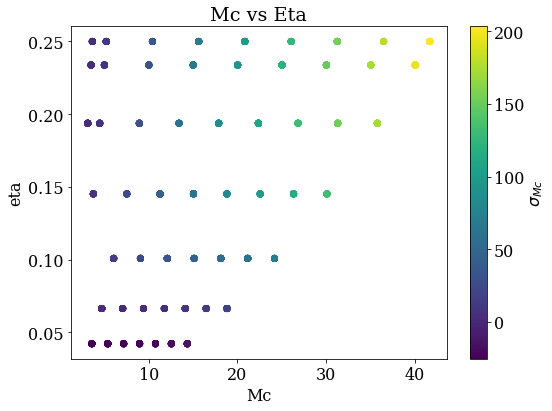

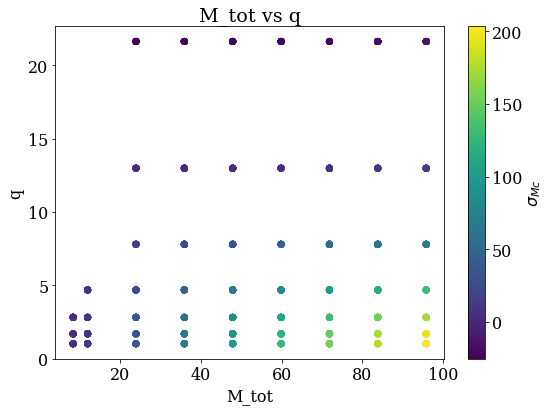

In [12]:
plot_bias_features(df["Mc"], df["eta"], df["Mc_full_bias"]/df["Mc_stat_err"], colormap="viridis",\
    title="Mc vs Eta", xlabel="Mc", ylabel="eta", cbar_label="$\sigma_{Mc}$")

plot_bias_features(df["M_tot"], df["q"], df["Mc_full_bias"]/df["Mc_stat_err"], colormap="viridis",\
    title="M_tot vs q", xlabel="M_tot", ylabel="q", cbar_label="$\sigma_{Mc}$")

All the events (so far) are biased more than 1 $\sigma$. The significance of the bias seems to be larger for migh Mc, unequal masses.

## Mc biases over lambda grid

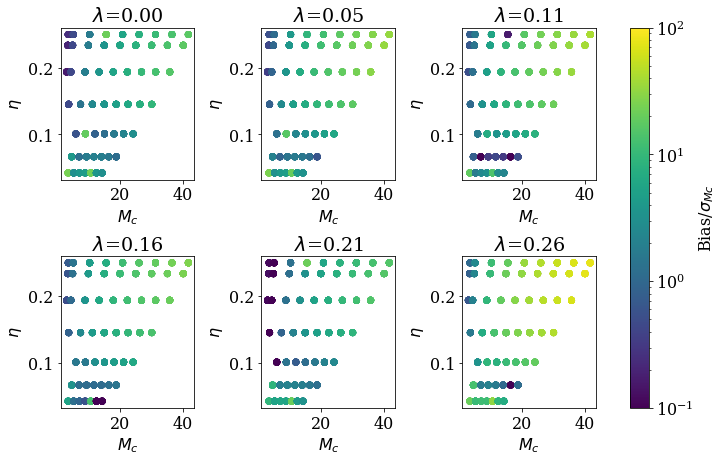

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))
lams_range = lams[:6]

for i, lam in enumerate(lams_range):
    ax = axes.flat[i]
    x= df["Mc"]
    y= df["eta"]
    c = df[f"bias_{4+(i*2)}"]/df["Mc_stat_err"]
    colormap="viridis"
    sc = ax.scatter(x,y, c=c, cmap=colormap, norm=matplotlib.colors.LogNorm(vmin=0.1, vmax=100))
    ax.set_ylabel("$\eta$")
    ax.set_xlabel("$M_c$")
    ax.set_title(f"$\lambda$={lams_range[i]:.2f}")
    plt.subplots_adjust(hspace=0.5, wspace=0.5)


cbar = fig.colorbar(sc, ax=axes.ravel().tolist())
cbar.set_label("Bias/$\sigma_{Mc}$")


plt.savefig(plotdir+'bias_sig_vs_lambda_grid.pdf', bbox='tight')
plt.show()
    

# Average Bias vs Lambda

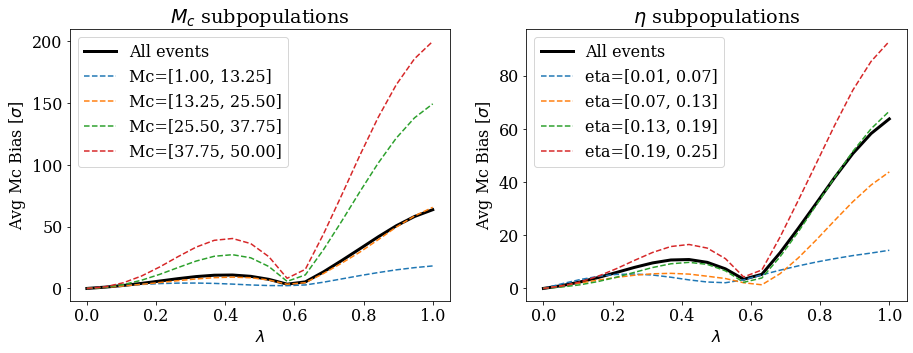

In [14]:
mc_brackets = np.linspace(1, 50, 5)
eta_brackets = np.linspace(0.01, 0.25, 5)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

avg_bias = np.zeros(n_lams)
for i in range(n_lams):
        bias = bias_lams.iloc[:,i].values / df["Mc_stat_err"]
        avg_bias[i] = np.average(bias)
axes[0].plot(lams, avg_bias, 'k', lw=3, label="All events")

for mc_index in range(1, len(mc_brackets)):
    avg_bias = np.zeros(n_lams)
    mc_mask = (df["Mc"] < mc_brackets[mc_index]) * (df["Mc"] > mc_brackets[mc_index-1])
    for i in range(n_lams):
        bias = bias_lams.iloc[:,i].values[mc_mask] / df["Mc_stat_err"][mc_mask]
        avg_bias[i] = np.average(bias)  
    axes[0].plot(lams, avg_bias, linestyle='--', label=f'Mc=[{mc_brackets[mc_index-1]:.2f}, {mc_brackets[mc_index]:.2f}]')

axes[0].set_xlabel("$\lambda$")
axes[0].set_ylabel("Avg Mc Bias [$\sigma$]")
axes[0].legend()
axes[0].set_title("$M_c$ subpopulations")

avg_bias = np.zeros(n_lams)
for i in range(n_lams):
        bias = bias_lams.iloc[:,i].values / df["Mc_stat_err"]
        avg_bias[i] = np.average(bias)
axes[1].plot(lams, avg_bias, 'k', lw=3, label="All events")

for eta_index in range(1, len(eta_brackets)):
    avg_bias = np.zeros(n_lams)
    eta_mask = (df["eta"] < eta_brackets[eta_index]) * (df["eta"] > eta_brackets[eta_index-1])

    for i in range(n_lams):
        bias = bias_lams.iloc[:,i].values[eta_mask] / df["Mc_stat_err"][eta_mask]
        avg_bias[i] = np.average(bias)
    
    axes[1].plot(lams, avg_bias, linestyle='--', label=f'eta=[{eta_brackets[eta_index-1]:.2f}, {eta_brackets[eta_index]:.2f}]')

axes[1].set_xlabel("$\lambda$")
axes[1].set_ylabel("Avg Mc Bias [$\sigma$]")
axes[1].legend()
axes[1].set_title("$\eta$ subpopulations")

plt.show()

The average bias is not monotonic over the entire lambda range. However, if we limit ourselves to small deviations from IMRPhenomXAS ($\lambda$ ~ 0.0), then things look better.

The average bias in Mc already reaches ~ 10 $\sigma$ for $\lambda$ ~ 0.3.

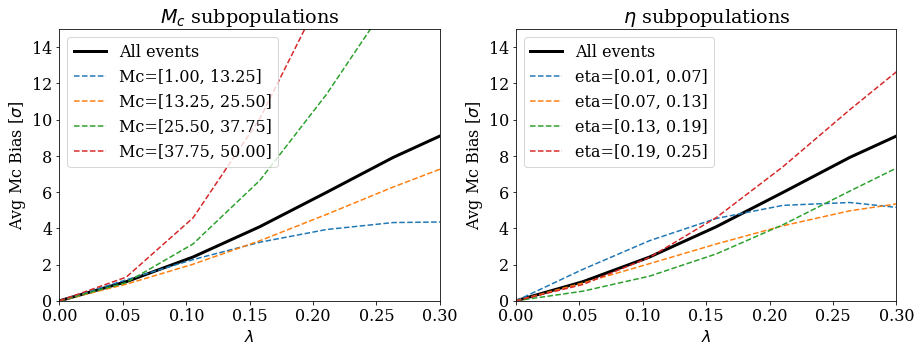

In [15]:
mc_brackets = np.linspace(1, 50, 5)
eta_brackets = np.linspace(0.01, 0.25, 5)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

avg_bias = np.zeros(n_lams)
for i in range(n_lams):
        bias = bias_lams.iloc[:,i].values / df["Mc_stat_err"]
        avg_bias[i] = np.average(bias)
axes[0].plot(lams, avg_bias, 'k', lw=3, label="All events")

for mc_index in range(1, len(mc_brackets)):
    avg_bias = np.zeros(n_lams)
    mc_mask = (df["Mc"] < mc_brackets[mc_index]) * (df["Mc"] > mc_brackets[mc_index-1])
    for i in range(n_lams):
        bias = bias_lams.iloc[:,i].values[mc_mask] / df["Mc_stat_err"][mc_mask]
        avg_bias[i] = np.average(bias)  
    axes[0].plot(lams, avg_bias, linestyle='--', label=f'Mc=[{mc_brackets[mc_index-1]:.2f}, {mc_brackets[mc_index]:.2f}]')

axes[0].set_xlabel("$\lambda$")
axes[0].set_ylabel("Avg Mc Bias [$\sigma$]")
axes[0].legend()
axes[0].set_title("$M_c$ subpopulations")
axes[0].set_xlim(0, 0.3)
axes[0].set_ylim(0, 15)

avg_bias = np.zeros(n_lams)
for i in range(n_lams):
        bias = bias_lams.iloc[:,i].values / df["Mc_stat_err"]
        avg_bias[i] = np.average(bias)
axes[1].plot(lams, avg_bias, 'k', lw=3, label="All events")

for eta_index in range(1, len(eta_brackets)):
    avg_bias = np.zeros(n_lams)
    eta_mask = (df["eta"] < eta_brackets[eta_index]) * (df["eta"] > eta_brackets[eta_index-1])

    for i in range(n_lams):
        bias = bias_lams.iloc[:,i].values[eta_mask] / df["Mc_stat_err"][eta_mask]
        avg_bias[i] = np.average(bias)
    
    axes[1].plot(lams, avg_bias, linestyle='--', label=f'eta=[{eta_brackets[eta_index-1]:.2f}, {eta_brackets[eta_index]:.2f}]')

axes[1].set_xlabel("$\lambda$")
axes[1].set_ylabel("Avg Mc Bias [$\sigma$]")
axes[1].legend()
axes[1].set_title("$\eta$ subpopulations")
axes[1].set_xlim(0, 0.3)
axes[1].set_ylim(0, 15)

plt.savefig(plotdir + 'bias_vs_lambda_0_03.pdf')
plt.show()

# Average Fathfulness vs lambda

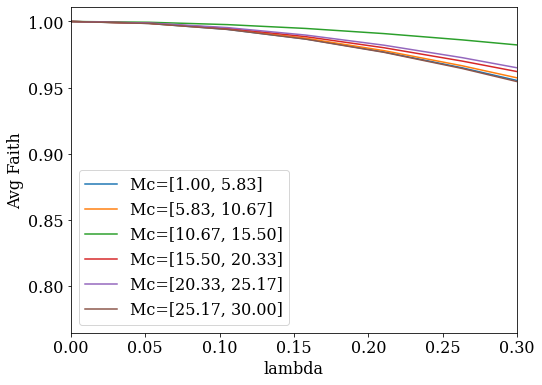

In [16]:
mc_brackets = np.linspace(1, 30, 7)

fig, ax = plt.subplots(figsize=(8, 6))

for mc_index in range(1, len(mc_brackets)):
    avg_faith = np.zeros(n_lams)
    mc_mask = (df["Mc"] < mc_brackets[mc_index]) * (df["Mc"] > mc_brackets[mc_index-1])

    for i in range(n_lams):
        faith = inner_prod_lams.iloc[:,i].values[mc_mask]
        avg_faith[i] = np.average(faith)
    
    plt.plot(lams, avg_faith, label=f'Mc=[{mc_brackets[mc_index-1]:.2f}, {mc_brackets[mc_index]:.2f}]')

plt.xlabel("lambda")
plt.ylabel("Avg Faith")
plt.xlim(0, 0.3)
plt.legend()
plt.show()

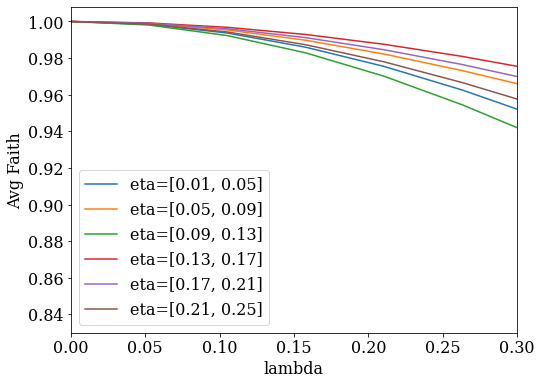

In [17]:
eta_brackets = np.linspace(0.01, 0.25, 7)

fig, ax = plt.subplots(figsize=(8, 6))

for index in range(1, len(eta_brackets)):
    avg_faith = np.zeros(n_lams)
    mask = (df["eta"] < eta_brackets[index]) * (df["eta"] > eta_brackets[index-1])

    for i in range(n_lams):
        faith = inner_prod_lams.iloc[:,i].values[mask]
        avg_faith[i] = np.average(faith)
    
    plt.plot(lams, avg_faith, label=f'eta=[{eta_brackets[index-1]:.2f}, {eta_brackets[index]:.2f}]')

plt.xlabel("lambda")
plt.ylabel("Avg Faith")
plt.xlim(0,0.3)
plt.legend()
plt.show()

# Average Faithfulness vs Avg Bias

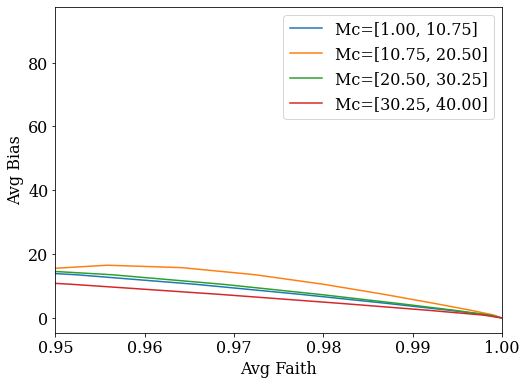

In [18]:
mc_brackets = np.linspace(1, 40, 5)

fig, ax = plt.subplots(figsize=(8, 6))

for mc_index in range(1, len(mc_brackets)):
    avg_faith = np.zeros(n_lams)
    mc_mask = (df["Mc"] < mc_brackets[mc_index]) * (df["Mc"] > mc_brackets[mc_index-1])

    for i in range(n_lams):
        faith = inner_prod_lams.iloc[:,i].values[mc_mask]
        avg_faith[i] = np.average(faith)

        bias = bias_lams.iloc[:,i].values[eta_mask] / df["Mc_stat_err"][eta_mask]
        avg_bias[i] = np.average(bias)
    
    plt.plot(avg_faith, avg_bias, label=f'Mc=[{mc_brackets[mc_index-1]:.2f}, {mc_brackets[mc_index]:.2f}]')

plt.xlabel("Avg Faith")
plt.ylabel("Avg Bias")
plt.xlim(0.95, 1)
plt.legend()
plt.show()

## fraction of unbiased events vs lambda

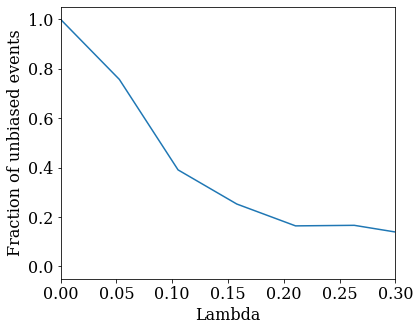

In [19]:
unbiased_frac = np.zeros(n_lams)
for i in range(n_lams):
    bias = bias_lams.iloc[:,i].values
    stat_err = df["Mc_stat_err"].values
    unbiased_mask = (bias < stat_err)
    unbiased_frac[i] = np.sum(unbiased_mask)/len(df["Mc"])

fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(lams, unbiased_frac)
plt.xlabel("Lambda")
plt.ylabel("Fraction of unbiased events")
plt.xlim(0, 0.3)
plt.show()